In [2]:
from citipy import citipy
import numpy as np
import pandas as pd
import json
import requests 


api_key = 'bf7fcab6071198c975c9df24fa5294b8'

# randomly generate >=500 numbers as latitude and longitude. use For loop to generate city names and generate dataframe
lat = np.random.uniform(-90,90,1500)
lng = np.random.uniform(-180,180,1500)
coords = pd.DataFrame({'lat':lat, 'lng': lng})
coords.loc[:, 'City']= [(citipy.nearest_city(coords['lat'][i],coords['lng'][i]).city_name) for i in range(0,len(coords['lat']))]
new_cities = coords.drop_duplicates('City',keep='first').reset_index()
new_cities.value_counts()

index  lat         lng          City       
0       48.121029   79.094199   ayagoz         1
784    -9.674880    49.518378   ambilobe       1
840    -11.571438  -72.917140   pangoa         1
842    -24.359042   46.120398   amboasary      1
844     29.158064   40.483334   sakakah        1
                                              ..
332     11.890626  -68.565092   nieuwpoort     1
334     50.854380  -108.662486  eston          1
335     56.202297   87.918438   mariinsk       1
340     25.040759  -7.989062    taoudenni      1
1491    17.295476  -89.143003   san ignacio    1
Length: 647, dtype: int64

In [2]:
# use FOR loop to generate a new dataframe with temperature, humidity, cloudiness and wind_speed
Temperature = []
Humidity = []
Cloudiness = []
Wind_Speed = []

for i in range(0,len(new_cities)):
    API_key = 'bf7fcab6071198c975c9df24fa5294b8'
    lat = new_cities['lat'][i]
    lon = new_cities['lng'][i]
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_key}"
    response =requests.get(url).json()
    try:
        Temperature.append((response['main']['temp']))
        Humidity.append((response['main']['humidity']))
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
    except KeyError:
        print("Missing city weather data")

new_cities['Temperature'] = Temperature
new_cities['Humidity(%)'] = Humidity
new_cities['Cloudiness(%)'] = Cloudiness
new_cities['Wind_Speed(mph)'] = Wind_Speed
new_cities


,index,lat,lng,City,Temperature,Humidity(%),Cloudiness(%),Wind_Speed(mph)
0,0,68.049708,113.918511,udachnyy,289.62,65,81,4.23
1,1,-21.821077,126.729486,yulara,293.69,26,0,4.66
2,2,11.615997,-37.442912,sao filipe,299.37,81,94,4.68
3,3,-79.254190,-154.314234,mataura,233.90,98,98,2.96
4,4,0.780954,-61.815954,barcelos,295.12,98,41,0.85
...,...,...,...,...,...,...,...,...
616,1488,-51.558665,-63.397723,rio gallegos,277.86,63,51,9.79
617,1490,41.625143,-17.971252,vila franca do campo,290.25,81,100,9.35
618,1493,25.441400,12.355466,awbari,310.01,9,0,4.30
619,1495,26.425952,43.529371,buraydah,315.15,7,15,3.67


In [5]:
API_key = 'bf7fcab6071198c975c9df24fa5294b8'
lat = new_cities['lat'][1]
lon = new_cities['lng'][1]
url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_key}"
requests.get(url).json()

{'coord': {'lon': 143.9491, 'lat': -33.888},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 287.31,
  'feels_like': 286.64,
  'temp_min': 287.31,
  'temp_max': 287.31,
  'pressure': 1026,
  'humidity': 71,
  'sea_level': 1026,
  'grnd_level': 1018},
 'visibility': 10000,
 'wind': {'speed': 2.93, 'deg': 302, 'gust': 3.19},
 'clouds': {'all': 100},
 'dt': 1655904579,
 'sys': {'country': 'AU', 'sunrise': 1655846953, 'sunset': 1655882572},
 'timezone': 36000,
 'id': 2163829,
 'name': 'Hatfield',
 'cod': 200}

In [4]:
#write data into a csv file and load all datas from scv would be quicker. 
new_cities.to_csv("city_weather_data.csv", encoding="utf-8", index=False)
file = 'city_weather_data.csv'
cities = pd.read_csv(file)
cities = cities.iloc[:500].reset_index()
cities

,level_0,index,lat,lng,City,Temperature,Humidity(%),Cloudiness(%),Wind_Speed(mph)
0,0,0,68.049708,113.918511,udachnyy,289.62,65,81,4.23
1,1,1,-21.821077,126.729486,yulara,293.69,26,0,4.66
2,2,2,11.615997,-37.442912,sao filipe,299.37,81,94,4.68
3,3,3,-79.254190,-154.314234,mataura,233.90,98,98,2.96
4,4,4,0.780954,-61.815954,barcelos,295.12,98,41,0.85
...,...,...,...,...,...,...,...,...,...
495,495,1081,34.911481,-138.068838,fortuna,290.95,82,0,9.31
496,496,1084,-27.361825,-44.149631,ilhabela,294.91,93,100,4.73
497,497,1088,54.674442,58.426407,yuryuzan,291.78,53,70,5.50
498,498,1092,55.166066,68.407477,mamlyutka,292.49,73,65,10.28


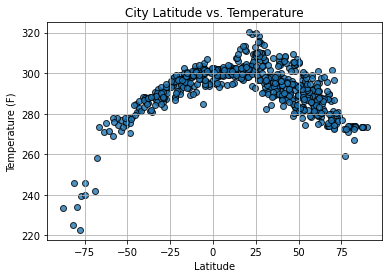

In [16]:
# plotting temperature vs lattitude

import matplotlib.pyplot as plt
plt.scatter(new_cities["lat"], new_cities["Temperature"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temp_Latitude.png")

# Show plot
plt.show()

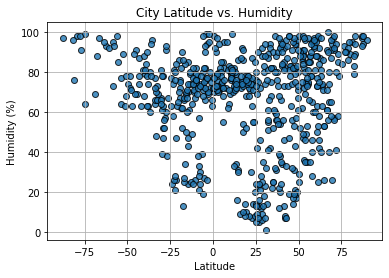

In [15]:
# plotting humidity vs lattitude
plt.scatter(new_cities["lat"], new_cities["Humidity(%)"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Humidity_Latitude.png")

# Show plot
plt.show()

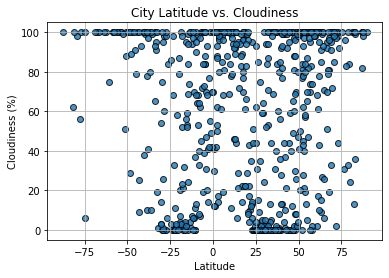

In [13]:
# plotting cloudiness vs lattitude
plt.scatter(new_cities["lat"], new_cities["Cloudiness(%)"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Cloudiness_Latitude.png")

# Show plot
plt.show()

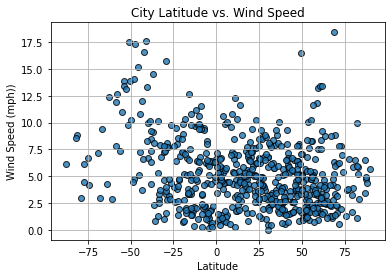

In [14]:
# plotting wind speed vs lattitude
plt.scatter(new_cities["lat"], new_cities["Wind_Speed(mph)"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("WindSpeed_Latitude.png")

# Show plot
plt.show()

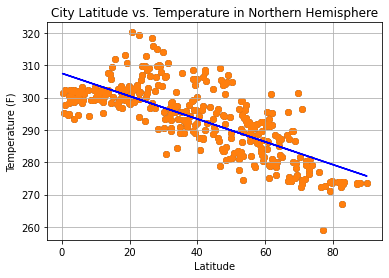

In [55]:
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

Northern_Hemisphere  = cities.loc[(cities['lat']>=0)]
Northern_Hemisphere

# Northern Hemisphere - Temperature (F) vs. Latitude (linear regression )
plt.scatter(Northern_Hemisphere["lat"], Northern_Hemisphere["Temperature"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Temperature in Northern Hemisphere")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

x_values = Northern_Hemisphere['lat']
y_values = Northern_Hemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, 'b-')

# Save the figure
plt.savefig("Temerature_Latitude_Norhern_Hemisphere.png")

# Show plot
plt.show()


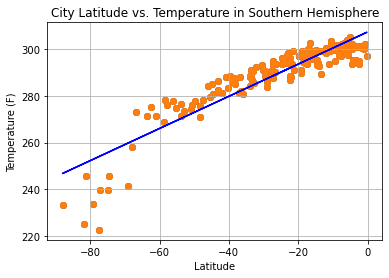

In [56]:
# Southern Hemisphere - Temperature (F) vs. Latitude (linear regression )
Southern_Hemisphere = cities.loc[(cities['lat']<=0)]
Southern_Hemisphere
plt.scatter(Southern_Hemisphere["lat"], Southern_Hemisphere["Temperature"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Temperature in Southern Hemisphere")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

x_values = Southern_Hemisphere['lat']
y_values = Southern_Hemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, 'b-')

# Save the figure
plt.savefig("Temperature_Latitude_Southern_Hemisphere.png")

# Show plot
plt.show()


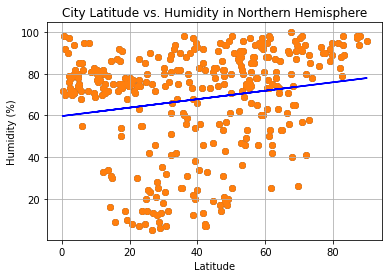

In [57]:
# Northern Hemisphere - Humidity (%) vs. Latitude (linear regression )
plt.scatter(Northern_Hemisphere["lat"], Northern_Hemisphere["Humidity(%)"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity in Northern Hemisphere")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

x_values = Northern_Hemisphere['lat']
y_values = Northern_Hemisphere['Humidity(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, 'b-')

# Save the figure
plt.savefig("Humidity_Latitude_Northern_Hemisphere.png")

# Show plot
plt.show()


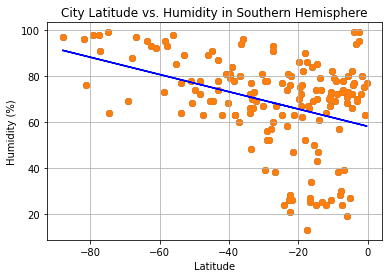

In [58]:
# Southern Hemisphere - Humidity (%) vs. Latitude (linear regression )
plt.scatter(Southern_Hemisphere["lat"], Southern_Hemisphere["Humidity(%)"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity in Southern Hemisphere")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

x_values = Southern_Hemisphere['lat']
y_values = Southern_Hemisphere['Humidity(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, 'b-')

# Save the figure
plt.savefig("Humidity_Latitude_Southern_Hemisphere.png")

# Show plot
plt.show()

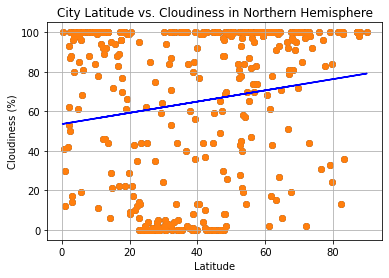

In [59]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude (linear regression )
plt.scatter(Northern_Hemisphere["lat"], Northern_Hemisphere["Cloudiness(%)"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness in Northern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

x_values = Northern_Hemisphere['lat']
y_values = Northern_Hemisphere['Cloudiness(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, 'b-')

# Save the figure
plt.savefig("Cloudiness_Latitude_Northern_Hemisphere.png")

# Show plot
plt.show()

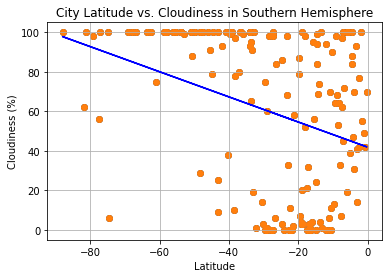

In [60]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude (linear regression )
plt.scatter(Southern_Hemisphere["lat"], Southern_Hemisphere["Cloudiness(%)"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness in Southern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

x_values = Southern_Hemisphere['lat']
y_values = Southern_Hemisphere['Cloudiness(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, 'b-')

# Save the figure
plt.savefig("Cloudiness_Latitude_Southern_Hemisphere.png")

# Show plot
plt.show()

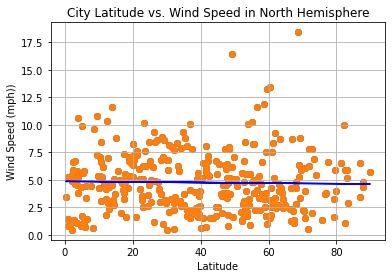

In [61]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude (linear regression )
plt.scatter(Northern_Hemisphere["lat"], Northern_Hemisphere["Wind_Speed(mph)"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed in North Hemisphere")
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

x_values = Northern_Hemisphere['lat']
y_values = Northern_Hemisphere['Wind_Speed(mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, 'b-')

# Save the figure
plt.savefig("Wind_Speed_Latitude_Northern_Hemisphere.png")

# Show plot
plt.show()

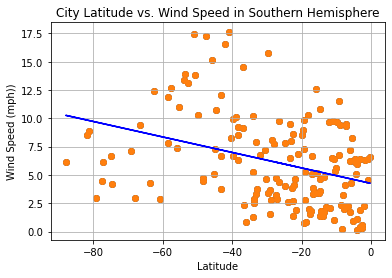

In [62]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude (linear regression )
plt.scatter(Southern_Hemisphere["lat"], Southern_Hemisphere["Wind_Speed(mph)"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed in Southern Hemisphere")
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

x_values = Southern_Hemisphere['lat']
y_values = Southern_Hemisphere['Wind_Speed(mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, 'b-')

# Save the figure
plt.savefig("Wind_Speed_Latitude_Southern_Hemisphere.png")

# Show plot
plt.show()

In [ ]:
# conclusions: 
# in Northern Hemisphere when cities are far a way from Equator the cities temperature becomes lower however, in Southern Hemisphere when cities closer to Equator the higher temperature
# in Norhern Hemisphere, when cities are far a way from Equator then hunidity increases slightly. in Southern Hemisphere when cities close to Equator the humidity drops dramatically.
# in South Hemisphere when cities close to Equator, the wind speed drops. in North Hemisphere the wind speed quite stable.